In [36]:
import numpy as np
import pickle
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def read_from_file(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [45]:
def read_train(path):
    train_data = []
    labels = []
    for file in glob.glob(os.path.join(path, 'data_batch*')):
        data = read_from_file(file)
        labels.append(data[b'labels'])
        train_data.append(data[b'data'])
    
    train_data = np.concatenate(train_data)
    labels = np.concatenate(labels)
    
    return train_data, labels

In [59]:
def read_test(path):
    test_data = []
    labels = []
    for file in glob.glob(os.path.join(path, 'test_batch*')):
        data = read_from_file(file)
        labels.append(data[b'labels'])
        test_data.append(data[b'data'])
    
    test_data = np.concatenate(test_data)
    labels = np.concatenate(labels)
    
    return test_data, labels

In [47]:
x_train, y_train = read_train('Cifar10/')

In [48]:
x_train = x_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [49]:
x_train.shape

(50000, 32, 32, 3)

## Show the first 25 images

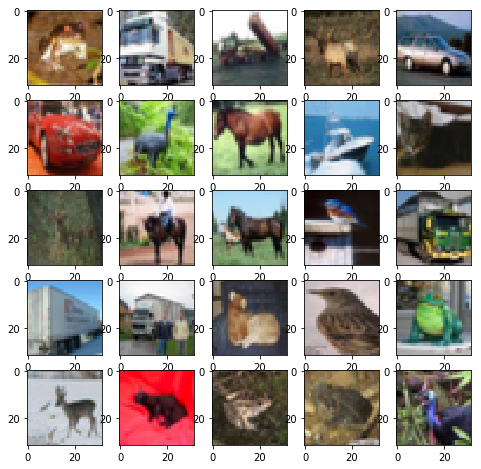

In [58]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])